In [22]:
import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd

# import Analysis_Funs as af
import QUANTAXIS as QA

import tools.Sample_Tools as smpl
# import tools.Pretreat_Tools as pretreat

# from tools.Cacher import (CACHE_TYPE, save_cache,load_cache_adv,load_cache)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [106]:
# QA.QA_fetch_index_list_adv()['name'].to_list()
# 'Ａ股指数'
# blenchmark='沪深300'
# data = smpl.get_benchmark(name=blenchmark, start='2017-01-01', end='2022-12-31')
data = smpl.get_data('601919', start='2017-01-01', end='2022-12-31').to_qfq()

base_origin = data.data['close']


In [87]:
# def xx(start,step,bound):
#   #原版
#     cum = pd.Series(np.zeros(len(base_origin)), index=base_origin.index)
#     last = base_origin.copy()

#     w=start
#     while(w<=bound): 
#         # print(w)
#         ma = base_origin.rolling(w).mean()
#         tmp = np.sign(last - ma)
#         tmp[tmp<0]=0
#         up_stat = (tmp > tmp.shift(1))*1 #比原版多一个持续才算，排除折返部分
#         cum= cum + tmp*up_stat
#         w += step
#         last = ma
        
#     result = cum/(bound/step)
#     return result

def xx(start,step,bound):
    # 双向测试版本
    cum = pd.Series(np.zeros(len(base_origin)), index=base_origin.index)
    last = base_origin.copy()

    w=start
    while(w<=bound): 
        # print(w)
        ma = base_origin.rolling(w).mean()
        tmp = np.sign(last - ma)
        up_stat = tmp[tmp>0]*((tmp > tmp.shift(1))*1)[tmp>0]
        down_stat = tmp[tmp<0]*((tmp < tmp.shift(1))*1)[tmp<0]
        
        cum= cum + pd.concat([up_stat,down_stat,tmp[tmp==0]]).sort_index()
        
        w += step
        last = ma
        
    result = cum/(bound/step)
    return result

<AxesSubplot:xlabel='date,code'>

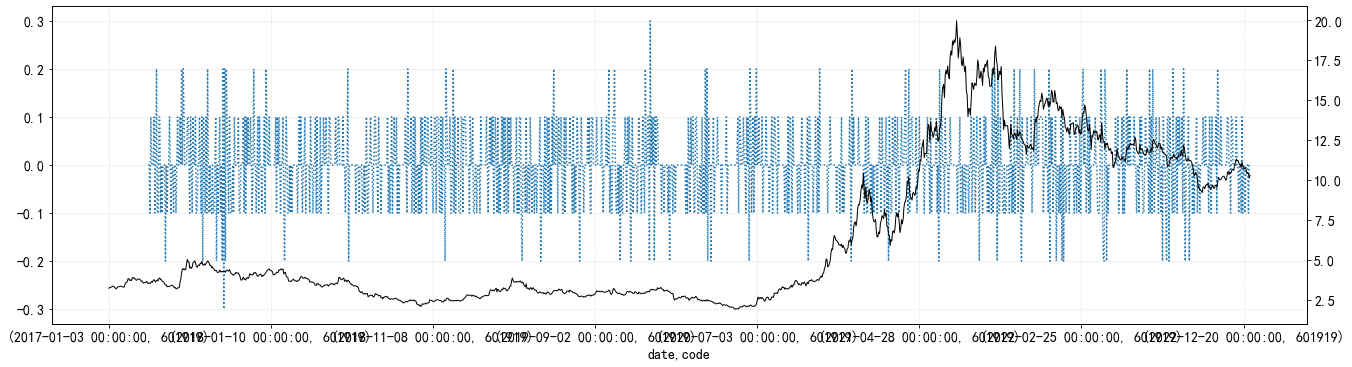

In [107]:
result = xx(5, 5, 50)
result.plot(figsize=(1620/72,420/72),linestyle=":")
plt.grid(linestyle="dotted",color="lightgray")
base_origin.plot(ax=plt.gca().twinx(), linewidth=1,color="black")

<AxesSubplot:xlabel='date,code'>

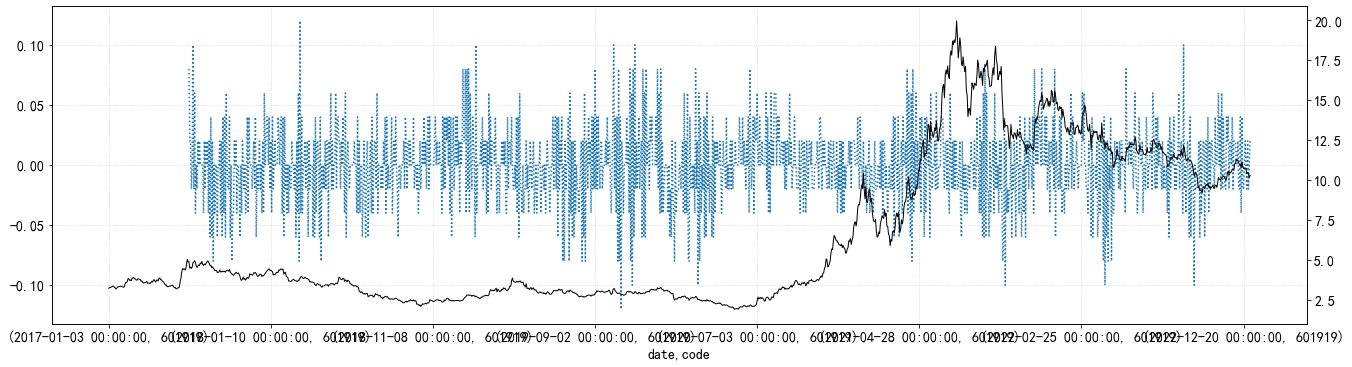

In [108]:
result = xx(2, 2, 100)
result.plot(figsize=(1620/72,420/72),linestyle=":")
plt.grid(linestyle="dotted",color="lightgray")
base_origin.plot(ax=plt.gca().twinx(), linewidth=1,color="black")


<AxesSubplot:xlabel='date,code'>

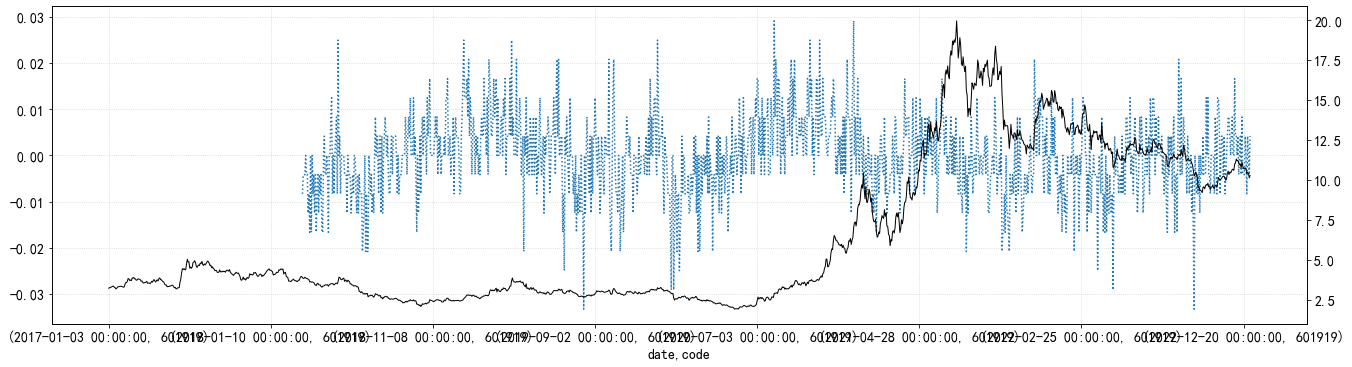

In [109]:
result = xx(2, 1, 240)
result.plot(figsize=(1620/72,420/72),linestyle=":")
plt.grid(linestyle="dotted",color="lightgray")
base_origin.plot(ax=plt.gca().twinx(), linewidth=1,color="black")


<AxesSubplot:xlabel='date,code'>

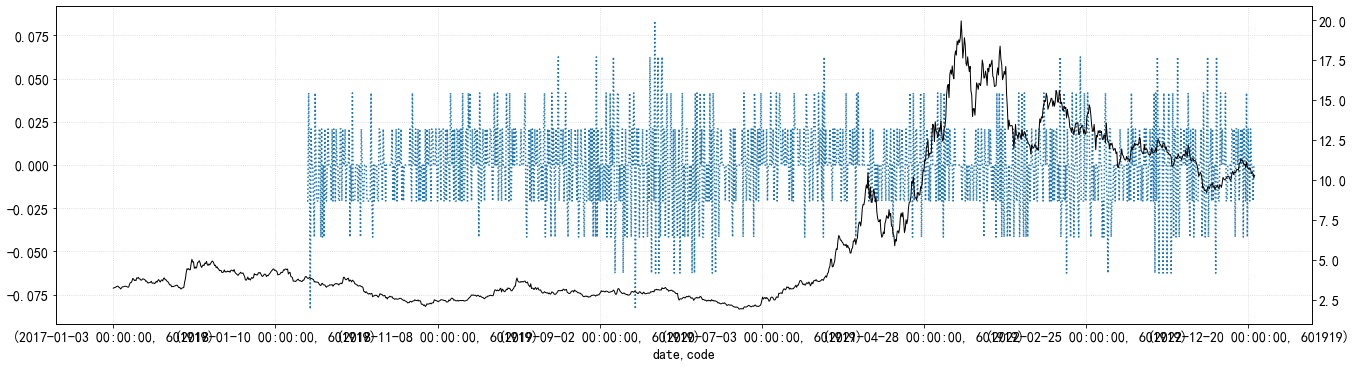

In [110]:
result = xx(5, 5, 240)
result.plot(figsize=(1620/72,420/72),linestyle=":")
plt.grid(linestyle="dotted",color="lightgray")
base_origin.plot(ax=plt.gca().twinx(), linewidth=1,color="black")


<AxesSubplot:xlabel='date,code'>

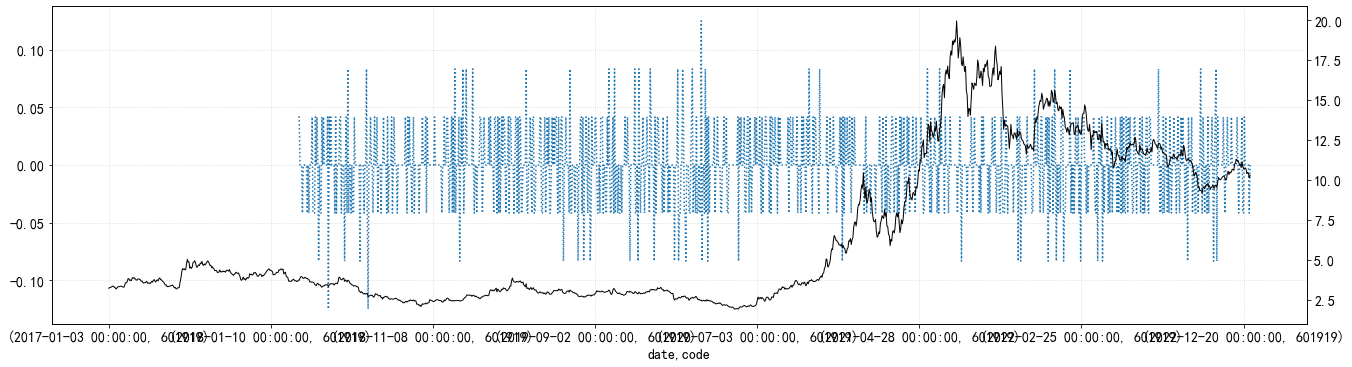

In [111]:
result = xx(5, 10, 240)
result.plot(figsize=(1620/72,420/72),linestyle=":")
plt.grid(linestyle="dotted",color="lightgray")
base_origin.plot(ax=plt.gca().twinx(), linewidth=1,color="black")
